#### https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

In [201]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler #
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, RANSACRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [202]:
outlier_way = 0 # 0: without dummy, 1: dummy variable for all, 2: dummy variables for each feature
linear_model_type = 0 # LinearRegression = 0, RANSACRegressor = 1
numFeatures = 2 # 0: considering all features, 1: considering onty top 5 features from correlation matrix, 2: considering onty top 10 features  from correlation matrix

In [203]:
df = pd.read_excel("df_Merge_ASDnVehiclenCompany_noMissingCol.xlsx")
# df.drop(columns='Unnamed: 0', axis=1, inplace=True)
print(df.shape)
df

(401, 59)


,LKR-ID,Landkreis,KFZ,Fläche [ha],LF gesamt [ha],Anteil LF [%],Lw. Betriebe gesamt,Betriebe bis 5 ha,Betriebe 5-20 ha,Betriebe 20-50 ha,...,Betriebe Öko-LF in Umst.,LF ökologisch [ha],LW-Fläche unter 5 ha,LW-Fläche 10-20 ha,LW-Fläche 20-50 ha,LW-Fläche 50-100 ha,LW-Fläche 100-200 ha,LW-Fläche über 200 ha,Number of machinery,Sum of Number of Tractors
0,7140,LK Rhein-Hunsrück-Kreis,SIM,93414.311,37301,39.900,719,31,300,150,...,25,1913,61,3377,4979,9330,10797,8757,1,497
1,7141,LK Rhein-Lahn-Kreis,EMS,75847.110,26679,35.200,491,31,178,92,...,180,1813,69,1931,3068,7318,9321,4973,23,450
2,7143,LK Westerwaldkreis,WW,95960.505,26296,27.400,503,26,196,115,...,452,6862,80,2358,3816,6100,8649,5294,2,751
3,7211,SK Trier,TR,11376.318,1860,16.300,50,12,13,13,...,0,74,23,121,394,523,0,0,0,216
4,7231,LK Bernkastel-Wittlich,WIL,113297.133,34098,30.100,1319,645,342,129,...,226,2728,1449,3417,4083,7615,0,0,5,920
5,7232,LK Eifelkreis Bitburg-Prüm,BIT,157901.855,78482,49.700,1324,34,415,288,...,996,6309,73,5154,9951,24598,27627,11079,49,1596
6,7233,LK Vulkaneifel,DAU,88389.607,31368,35.500,585,16,237,124,...,373,3129,35,2681,4172,7180,12205,5097,21,399
7,7235,LK Trier-Saarburg,TR,107080.073,33289,31.100,1185,477,383,108,...,0,2278,1063,3694,3596,8220,0,0,13,527
8,7311,SK Frankenthal (Pfalz),FT,4240.371,2243,52.900,38,0,4,11,...,0,317,0,29,379,877,912,0,0,69
9,7312,SK Kaiserslautern,KL,13542.016,1183,8.700,19,0,3,0,...,0,0,0,36,0,0,638,0,0,78


In [204]:
# Check for duplicates
idsUnique = len(set(df.Landkreis))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 401 total entries


In [205]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["Number of machinery"], ascending = False, inplace = True)
corr["Number of machinery"].head(20)

Find most important features relative to target


Number of machinery         1.000
Ackerbaubetriebe            0.658
Betriebe Zuchtsauen         0.646
Betriebe 50-100 ha          0.633
LW-Fläche 50-100 ha         0.629
Betriebe Schweine           0.602
Sum of Number of Tractors   0.594
Lw. Betriebe gesamt         0.577
Viehbestand GV              0.566
Betriebe Viehhaltung        0.563
LW-Fläche 20-50 ha          0.555
Anzahl Zuchtsauen           0.554
Betriebe 20-50 ha           0.549
Anzahl Schweine             0.534
Fläche Triticale [ha]       0.521
Silomais [ha]               0.521
Fläche Grünernte [ha]       0.516
Körnermais [ha]             0.507
Kartoffeln [ha]             0.501
LW-Fläche 10-20 ha          0.479
Name: Number of machinery, dtype: float64

### Handle remaining missing values for numerical features by using median as replacement

In [206]:
print("NAs for numerical features in train : " + str(df.isnull().values.sum()))
# df_num = df_num.fillna(train_num.median())
# print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 0


### Differentiate numerical features (minus the target) and categorical features

In [207]:
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df[numerical_features]
df_cat = df[categorical_features]
df_num.drop(columns=['LKR-ID'], inplace=True) # LKR-ID is just a classification number

Numerical features : 57
Categorical features : 2


# Dealing with outliers
#### https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [208]:
from scipy import stats



### Dealing with outliers by means of Z value
# threshold = 5
# df_outliners = df_all[(np.abs(stats.zscore(df_all)) < threshold).all(axis=1)]
# print('By means of Z-score, we get df shape = {}'.format(df_outliners.shape))

### Dealing with outliers by means of Interquartile
###Interquartile is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
# df_IQR = df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_all > (Q3 + 1.5 * IQR))).any(axis=1)]
# print('getting rid of outliers By means of IQR, we get df shape = {}'.format(df_IQR.shape))
# sns.boxplot(x=df_num['Number of machinery'])

### Dealing with outliers by means of dummy variable
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

df_dummy = df_num.copy()
if outlier_way == 1:
    df_dummy['dummy variable for outliers'] = 0
    df_dummy.loc[df_dummy[((df_dummy < (Q1 - 1.5 * IQR)) | 
                          (df_dummy > (Q3 + 1.5 * IQR))).any(axis=1)].index, ['dummy variable for outliers']] = 1


elif outlier_way == 2:
    for column in df_num.columns:
        df_dummy['DV for ' + column] = 0
        df_dummy.loc[df_dummy[((df_dummy[column] < (Q1[column] - 1.5 * IQR[column])) | 
                          (df_dummy[column] > (Q3[column] + 1.5 * IQR[column])))].index, ['DV for ' + column]] = 1

features = df_num.columns
df_dummy.drop(columns=features, inplace=True)
###
print(df_num.shape)
print(df_dummy.shape)

(401, 56)
(401, 0)


# log transformation

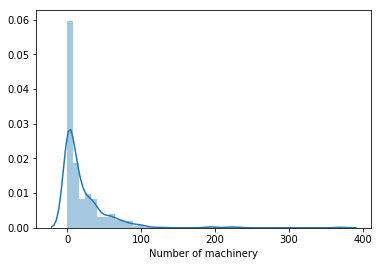

In [209]:
#hstogram
sns.distplot(df_num['Number of machinery']);

In [210]:
# Log transform of the skewed numerical features to lessen impact of outliers
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = df_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_num[skewed_features] = np.log1p(df_num[skewed_features])

55 skewed numerical features to log transform


Index(['Fläche [ha]', 'LF gesamt [ha]', 'Lw. Betriebe gesamt',
       'Betriebe bis 5 ha', 'Betriebe 5-20 ha', 'Betriebe 20-50 ha',
       'Betriebe 50-100 ha', 'Betriebe 100-200 ha', 'Betriebe über 200 ha',
       'Betriebe über 100 ha', 'Anteil der Betriebe über 100 ha [%]',
       'Betriebe Viehhaltung', 'Viehbestand GV', 'Betriebe Rinder',
       'Bestand Rinder', 'Milchkuhhalter', 'Milchkühe', 'Betriebe Schweine',
       'Anzahl Schweine', 'Betriebe Zuchtsauen', 'Anzahl Zuchtsauen',
       'Betriebe Schafe', 'Anzahl Schafe', 'Ackerbaubetriebe',
       'Betriebe Dauerkulturen', 'Ackerlandfläche [ha]', 'Grünlandfläche [ha]',
       'Fläche Dauerkulturen [ha]', 'Fläche Getreide [ha]', 'Weizen [ha]',
       'Fläche Winterweizen [ha]', 'Fläche Roggen+WinterMG [ha]',
       'Fläche Triticale [ha]', 'Fläche Gerste [ha]', 'Fläche Hafer [ha]',
       'Sonstiges Getreide [ha]', 'Körnermais [ha]', 'Zuckerrüben [ha]',
       'Kartoffeln [ha]', 'Silomais [ha]', 'Hülsenfrüchte [ha]',
       'Fl

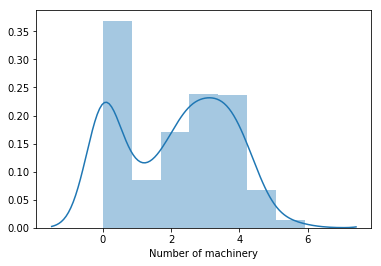

In [211]:
#hstogram
print(skewed_features)
sns.distplot(df_num['Number of machinery']);

# Standardize numerical features
### Scale to [0;1] (give equal weight to all features, assuming a linear distribution of values and no significant outliers)
### Shift mean to 0 (to center the data set; this will not affect the output at all for most algorithms.)

In [212]:
# Standardize numerical features
features = df_num.columns
stdSc = StandardScaler()
df_num = stdSc.fit_transform(df_num)
df_num = pd.DataFrame.from_records(df_num)
df_num.columns = features

# differentiate dependent and indenpendent data

In [213]:
if outlier_way > 0:
    df_num = pd.concat([df_num, df_dummy], axis=1)
    print(df_num.shape)
y = df_num["Number of machinery"]
y_features = df_num.columns
y_features = y_features.drop("Number of machinery")
df_num = df_num[y_features]

In [214]:

if numFeatures == 1:
    nonfive_features = df_num.columns
    five_features = ['Betriebe Zuchtsauen', 'Ackerbaubetriebe', 'Betriebe 50-100 ha', 'LW-Fläche 50-100 ha', 'Betriebe Schweine']
    nonfive_features = nonfive_features.drop(five_features)
    df_num.drop(columns=nonfive_features, inplace=True)
if numFeatures == 2:
    nonten_features = df_num.columns
    ten_features = ['Betriebe Zuchtsauen', 'Ackerbaubetriebe', 'Betriebe 50-100 ha', 'LW-Fläche 50-100 ha', 'Betriebe Schweine',
                'Sum of Number of Tractors', 'Viehbestand GV', 'Anzahl Zuchtsauen', 'Lw. Betriebe gesamt', 'Betriebe Viehhaltung']
    nonten_features = nonten_features.drop(ten_features)
    df_num.drop(columns=nonten_features, inplace=True)

# Modeling

In [215]:
# Join categorical and numerical features
# train = pd.concat([df_num, df_cat], axis = 1)
train = df_num
print("New number of features : " + str(train.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.25, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10)) # k-fold, set k as 10
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

New number of features : 10
X_train : (300, 10)
X_test : (101, 10)
y_train : (300,)
y_test : (101,)


# 1* Linear Regression without regularization

LinearRegression
without dummy
Considering only Top 10 features
RMSE on Training set : 0.5758398371670512
RMSE on Test set : 0.704913435408584
Intercept: 0.0008258814572593629
R2 score of train:  0.6805079632469608
R2 score of test:  0.5767908083555482


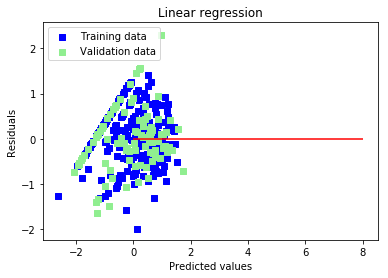

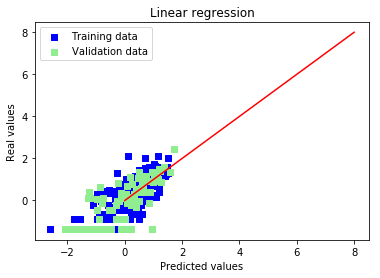

,coef,features
0,0.617,Ackerbaubetriebe
1,0.431,Sum of Number of Tractors
2,0.141,Betriebe Schweine
3,0.135,Anzahl Zuchtsauen
4,0.118,Betriebe Zuchtsauen
5,0.048,Viehbestand GV
6,-0.021,LW-Fläche 50-100 ha
7,-0.056,Betriebe 50-100 ha
8,-0.260,Lw. Betriebe gesamt
9,-0.270,Betriebe Viehhaltung


In [216]:
# Look at predictions on training and validation set
# printing values


# Linear Regression
if linear_model_type == 0:
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_coef = list(zip(lr.coef_, df_num.columns))
    lr_coef.sort(reverse=True)
    intercept_ = lr.intercept_

if linear_model_type == 1:
    lr = RANSACRegressor()
    lr.fit(X_train, y_train)
    lr_coef = list(zip(lr.estimator_.coef_, df_num.columns))
    lr_coef.sort(reverse=True)
    intercept_ = lr.estimator_.intercept_
    
if linear_model_type == 0:
    print('LinearRegression')
elif linear_model_type == 1:
    print('RANSACRegressor')
if outlier_way == 0:
    print('without dummy')
elif outlier_way == 1:
    print('Dummy for all features')
elif outlier_way == 2:
    print('Dummy for each feature')
if numFeatures == 1:
    print('Considering only Top 5 features')
elif numFeatures == 2:
    print('Considering only Top 10 features')

    
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
    
df_lr_coef = pd.DataFrame.from_records(lr_coef, columns=['coef', 'features'])
print('Intercept:', intercept_)
print('R2 score of train: ', r2_train)
print('R2 score of test: ', r2_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 8, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 8], [0, 8], c = "red")
plt.show()

df_lr_coef.head(20)

In [217]:
df_lr_coef.loc[df_lr_coef['features'] == 'dummy variable for outliers']

,coef,features


In [218]:
df_num['DV for Weizen [ha]'].describe()
sns.distplot(df_num['DV for Weizen [ha]'])

KeyError: 'DV for Weizen [ha]'